<a href="https://colab.research.google.com/github/VictorL85/Licita-o/blob/main/Licitacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install basedosdados

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing installation: tomlkit 0.13.3
    Uninstalling tomlkit-0.13.3:
      Successfully uninstalled tomlkit-0.13.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.49.1 requires tomlkit<0.14.0,>=0.12.0, but you have tomlkit 0.11.8 which is incompatible.


In [2]:
import pandas as pd
import basedosdados as bd
from pandas_gbq import read_gbq
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
billing_id = 'ebac-472003'

query = """
  SELECT
    dados.id_licitacao as id_licitacao,
    dados.descricao_item as descricao_item,
    dados.quantidade_item as quantidade_item,
    dados.valor_item as valor_item
FROM `basedosdados.br_cgu_licitacao_contrato.licitacao_item` AS dados
LIMIT 1000
"""

df_item = bd.read_sql(query = query, billing_project_id = billing_id)

Downloading: 100%|██████████|


In [4]:
query = """
  SELECT
    dados.ano as ano,
    dados.mes as mes,
    dados.id_licitacao as id_licitacao,
    dados.nome_unidade_gestora as nome_unidade_gestora,
    dados.objeto as objeto,
    dados.situacao_licitacao as situacao_licitacao,
    dados.nome_orgao_superior as nome_orgao_superior,
    dados.nome_orgao as nome_orgao,
    dados.valor_licitacao as valor_licitacao
FROM `basedosdados.br_cgu_licitacao_contrato.licitacao` AS dados
LIMIT 1000
"""

df_lis = bd.read_sql(query = query, billing_project_id = billing_id)

Downloading: 100%|██████████|


In [5]:
query = """
  SELECT
    dados.id_contrato as id_contrato,
    dados.modalidade as modalidade,
    dados.situacao_contrato as situacao_contrato,
    dados.nome_contratado as nome_contratado,
    dados.id_licitacao as id_licitacao,
    dados.valor_inicial_compra as valor_inicial_compra,
    dados.valor_final_compra as valor_final_compra
FROM `basedosdados.br_cgu_licitacao_contrato.contrato_compra` AS dados
LIMIT 1000
"""

df_com = bd.read_sql(query = query, billing_project_id = billing_id)

Downloading: 100%|██████████|


In [ ]:
df_lis.isnull().sum()

,0
ano,0
mes,0
id_licitacao,0
nome_unidade_gestora,0
objeto,0
situacao_licitacao,0
nome_orgao_superior,0
nome_orgao,0
valor_licitacao,0


In [22]:
df_incom = pd.merge(df_lis, df_item, on='id_licitacao', how='inner')
df = pd.merge(df_incom, df_com, on='id_licitacao', how='inner')
df.head(3)

,ano,mes,id_licitacao,nome_unidade_gestora,objeto,situacao_licitacao,nome_orgao_superior,nome_orgao,valor_licitacao,descricao_item,quantidade_item,valor_item,id_contrato,modalidade,situacao_contrato,nome_contratado,valor_inicial_compra,valor_final_compra
0,2014,6,52014,COMISSAO NACIONAL DE ENERGIA NUCLEAR-IPEN,Objeto: Aquisição de equipamento para condicio...,Evento de Resultado de Julgame,"Ministério da Ciência, Tecnologia e Inovaç",Comissão Nacional de Energia Nuclear,28386.6,OBRAS CIVIS DE EDIFICACOES PREDIAIS,1,231784.18,212014,Pregão - Registro de Preço,Rescindido - Publicado,GARTNER DO BRASIL SERVICOS DE PESQUISAS LTDA.,509100.0,1152900.0
1,2014,6,52014,COMISSAO NACIONAL DE ENERGIA NUCLEAR-IPEN,Objeto: Aquisição de equipamento para condicio...,Evento de Resultado de Julgame,"Ministério da Ciência, Tecnologia e Inovaç",Comissão Nacional de Energia Nuclear,28386.6,OBRAS CIVIS DE RECUPERACAO ESTRUTURAL - TRATAM...,1,154519.21,212014,Pregão - Registro de Preço,Rescindido - Publicado,GARTNER DO BRASIL SERVICOS DE PESQUISAS LTDA.,509100.0,1152900.0
2,2014,6,52014,COMISSAO NACIONAL DE ENERGIA NUCLEAR-IPEN,Objeto: Aquisição de equipamento para condicio...,Evento de Resultado de Julgame,"Ministério da Ciência, Tecnologia e Inovaç",Comissão Nacional de Energia Nuclear,28386.6,MANUTENCAO AERONAVE - AVIAO / HELICOPTERO / UL...,1,1374.85,212014,Pregão - Registro de Preço,Rescindido - Publicado,GARTNER DO BRASIL SERVICOS DE PESQUISAS LTDA.,509100.0,1152900.0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
ano,0
mes,0
id_licitacao,0
nome_unidade_gestora,0
objeto,0
situacao_licitacao,0
nome_orgao_superior,0
nome_orgao,0
valor_licitacao,0
descricao_item,0


In [ ]:
df.head(3)

,ano,mes,id_licitacao,nome_unidade_gestora,objeto,situacao_licitacao,nome_orgao_superior,nome_orgao,valor_licitacao,descricao_item,quantidade_item,valor_item,id_contrato,modalidade,situacao_contrato,nome_contratado,valor_inicial_compra,valor_final_compra
0,2017,9,12017,GRUPAMENTO DE APOIO AS UNIDADES DO SISTEMA DE,Objeto: Contratação de empresa especializada n...,Evento de Resultado de Julgame,Ministério da Defesa,Comando da Aeronáutica,13800.0,INSTALACOES PREDIAIS ELETRICAS,1,44479.65,242018,Pregão - Registro de Preço,Publicado,TECNO2000 INDUSTRIA E COMERCIO LTDA,24450.0,24450.0
1,2017,9,12017,GRUPAMENTO DE APOIO AS UNIDADES DO SISTEMA DE,Objeto: Contratação de empresa especializada n...,Evento de Resultado de Julgame,Ministério da Defesa,Comando da Aeronáutica,13800.0,MANUTENCAO / REFORMA PREDIAL,1,357515.97,242018,Pregão - Registro de Preço,Publicado,TECNO2000 INDUSTRIA E COMERCIO LTDA,24450.0,24450.0
2,2017,9,12017,GRUPAMENTO DE APOIO AS UNIDADES DO SISTEMA DE,Objeto: Contratação de empresa especializada n...,Evento de Resultado de Julgame,Ministério da Defesa,Comando da Aeronáutica,13800.0,MANUTENCAO / REFORMA PREDIAL,1,48337.00,242018,Pregão - Registro de Preço,Publicado,TECNO2000 INDUSTRIA E COMERCIO LTDA,24450.0,24450.0


In [23]:
df['aumento_inical_final'] = df['valor_final_compra'] - df['valor_inicial_compra']
df.head(3)

,ano,mes,id_licitacao,nome_unidade_gestora,objeto,situacao_licitacao,nome_orgao_superior,nome_orgao,valor_licitacao,descricao_item,quantidade_item,valor_item,id_contrato,modalidade,situacao_contrato,nome_contratado,valor_inicial_compra,valor_final_compra,aumento_inical_final
0,2014,6,52014,COMISSAO NACIONAL DE ENERGIA NUCLEAR-IPEN,Objeto: Aquisição de equipamento para condicio...,Evento de Resultado de Julgame,"Ministério da Ciência, Tecnologia e Inovaç",Comissão Nacional de Energia Nuclear,28386.6,OBRAS CIVIS DE EDIFICACOES PREDIAIS,1,231784.18,212014,Pregão - Registro de Preço,Rescindido - Publicado,GARTNER DO BRASIL SERVICOS DE PESQUISAS LTDA.,509100.0,1152900.0,643800.0
1,2014,6,52014,COMISSAO NACIONAL DE ENERGIA NUCLEAR-IPEN,Objeto: Aquisição de equipamento para condicio...,Evento de Resultado de Julgame,"Ministério da Ciência, Tecnologia e Inovaç",Comissão Nacional de Energia Nuclear,28386.6,OBRAS CIVIS DE RECUPERACAO ESTRUTURAL - TRATAM...,1,154519.21,212014,Pregão - Registro de Preço,Rescindido - Publicado,GARTNER DO BRASIL SERVICOS DE PESQUISAS LTDA.,509100.0,1152900.0,643800.0
2,2014,6,52014,COMISSAO NACIONAL DE ENERGIA NUCLEAR-IPEN,Objeto: Aquisição de equipamento para condicio...,Evento de Resultado de Julgame,"Ministério da Ciência, Tecnologia e Inovaç",Comissão Nacional de Energia Nuclear,28386.6,MANUTENCAO AERONAVE - AVIAO / HELICOPTERO / UL...,1,1374.85,212014,Pregão - Registro de Preço,Rescindido - Publicado,GARTNER DO BRASIL SERVICOS DE PESQUISAS LTDA.,509100.0,1152900.0,643800.0


In [24]:
quartiles = df['valor_final_compra'].quantile([0.25, 0.75])
q1 = quartiles[0.25]
q3 = quartiles[0.75]

def nivel(value):
    if value <= q1:
        return 'baixo custo'
    elif value >= q3:
        return 'alto custo'
    else:
        return 'medio custo'

df['nivel_custo'] = df['valor_final_compra'].apply(nivel)
display(df.head(3))

,ano,mes,id_licitacao,nome_unidade_gestora,objeto,situacao_licitacao,nome_orgao_superior,nome_orgao,valor_licitacao,descricao_item,quantidade_item,valor_item,id_contrato,modalidade,situacao_contrato,nome_contratado,valor_inicial_compra,valor_final_compra,aumento_inical_final,nivel_custo
0,2014,6,52014,COMISSAO NACIONAL DE ENERGIA NUCLEAR-IPEN,Objeto: Aquisição de equipamento para condicio...,Evento de Resultado de Julgame,"Ministério da Ciência, Tecnologia e Inovaç",Comissão Nacional de Energia Nuclear,28386.6,OBRAS CIVIS DE EDIFICACOES PREDIAIS,1,231784.18,212014,Pregão - Registro de Preço,Rescindido - Publicado,GARTNER DO BRASIL SERVICOS DE PESQUISAS LTDA.,509100.0,1152900.0,643800.0,alto custo
1,2014,6,52014,COMISSAO NACIONAL DE ENERGIA NUCLEAR-IPEN,Objeto: Aquisição de equipamento para condicio...,Evento de Resultado de Julgame,"Ministério da Ciência, Tecnologia e Inovaç",Comissão Nacional de Energia Nuclear,28386.6,OBRAS CIVIS DE RECUPERACAO ESTRUTURAL - TRATAM...,1,154519.21,212014,Pregão - Registro de Preço,Rescindido - Publicado,GARTNER DO BRASIL SERVICOS DE PESQUISAS LTDA.,509100.0,1152900.0,643800.0,alto custo
2,2014,6,52014,COMISSAO NACIONAL DE ENERGIA NUCLEAR-IPEN,Objeto: Aquisição de equipamento para condicio...,Evento de Resultado de Julgame,"Ministério da Ciência, Tecnologia e Inovaç",Comissão Nacional de Energia Nuclear,28386.6,MANUTENCAO AERONAVE - AVIAO / HELICOPTERO / UL...,1,1374.85,212014,Pregão - Registro de Preço,Rescindido - Publicado,GARTNER DO BRASIL SERVICOS DE PESQUISAS LTDA.,509100.0,1152900.0,643800.0,alto custo


In [25]:
df['data'] = pd.to_datetime(df['ano'].astype(str) + '-' + df['mes'].astype(str)).dt.to_period('M')
display(df.head(3))

,ano,mes,id_licitacao,nome_unidade_gestora,objeto,situacao_licitacao,nome_orgao_superior,nome_orgao,valor_licitacao,descricao_item,...,valor_item,id_contrato,modalidade,situacao_contrato,nome_contratado,valor_inicial_compra,valor_final_compra,aumento_inical_final,nivel_custo,data
0,2014,6,52014,COMISSAO NACIONAL DE ENERGIA NUCLEAR-IPEN,Objeto: Aquisição de equipamento para condicio...,Evento de Resultado de Julgame,"Ministério da Ciência, Tecnologia e Inovaç",Comissão Nacional de Energia Nuclear,28386.6,OBRAS CIVIS DE EDIFICACOES PREDIAIS,...,231784.18,212014,Pregão - Registro de Preço,Rescindido - Publicado,GARTNER DO BRASIL SERVICOS DE PESQUISAS LTDA.,509100.0,1152900.0,643800.0,alto custo,2014-06
1,2014,6,52014,COMISSAO NACIONAL DE ENERGIA NUCLEAR-IPEN,Objeto: Aquisição de equipamento para condicio...,Evento de Resultado de Julgame,"Ministério da Ciência, Tecnologia e Inovaç",Comissão Nacional de Energia Nuclear,28386.6,OBRAS CIVIS DE RECUPERACAO ESTRUTURAL - TRATAM...,...,154519.21,212014,Pregão - Registro de Preço,Rescindido - Publicado,GARTNER DO BRASIL SERVICOS DE PESQUISAS LTDA.,509100.0,1152900.0,643800.0,alto custo,2014-06
2,2014,6,52014,COMISSAO NACIONAL DE ENERGIA NUCLEAR-IPEN,Objeto: Aquisição de equipamento para condicio...,Evento de Resultado de Julgame,"Ministério da Ciência, Tecnologia e Inovaç",Comissão Nacional de Energia Nuclear,28386.6,MANUTENCAO AERONAVE - AVIAO / HELICOPTERO / UL...,...,1374.85,212014,Pregão - Registro de Preço,Rescindido - Publicado,GARTNER DO BRASIL SERVICOS DE PESQUISAS LTDA.,509100.0,1152900.0,643800.0,alto custo,2014-06


In [27]:
df['valor_item_unico'] = df['valor_item'] / df['quantidade_item']
df.head(3)

,ano,mes,id_licitacao,nome_unidade_gestora,objeto,situacao_licitacao,nome_orgao_superior,nome_orgao,valor_licitacao,descricao_item,...,id_contrato,modalidade,situacao_contrato,nome_contratado,valor_inicial_compra,valor_final_compra,aumento_inical_final,nivel_custo,data,valor_item_unico
0,2014,6,52014,COMISSAO NACIONAL DE ENERGIA NUCLEAR-IPEN,Objeto: Aquisição de equipamento para condicio...,Evento de Resultado de Julgame,"Ministério da Ciência, Tecnologia e Inovaç",Comissão Nacional de Energia Nuclear,28386.6,OBRAS CIVIS DE EDIFICACOES PREDIAIS,...,212014,Pregão - Registro de Preço,Rescindido - Publicado,GARTNER DO BRASIL SERVICOS DE PESQUISAS LTDA.,509100.0,1152900.0,643800.0,alto custo,2014-06,231784.18
1,2014,6,52014,COMISSAO NACIONAL DE ENERGIA NUCLEAR-IPEN,Objeto: Aquisição de equipamento para condicio...,Evento de Resultado de Julgame,"Ministério da Ciência, Tecnologia e Inovaç",Comissão Nacional de Energia Nuclear,28386.6,OBRAS CIVIS DE RECUPERACAO ESTRUTURAL - TRATAM...,...,212014,Pregão - Registro de Preço,Rescindido - Publicado,GARTNER DO BRASIL SERVICOS DE PESQUISAS LTDA.,509100.0,1152900.0,643800.0,alto custo,2014-06,154519.21
2,2014,6,52014,COMISSAO NACIONAL DE ENERGIA NUCLEAR-IPEN,Objeto: Aquisição de equipamento para condicio...,Evento de Resultado de Julgame,"Ministério da Ciência, Tecnologia e Inovaç",Comissão Nacional de Energia Nuclear,28386.6,MANUTENCAO AERONAVE - AVIAO / HELICOPTERO / UL...,...,212014,Pregão - Registro de Preço,Rescindido - Publicado,GARTNER DO BRASIL SERVICOS DE PESQUISAS LTDA.,509100.0,1152900.0,643800.0,alto custo,2014-06,1374.85


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype    
---  ------                --------------  -----    
 0   ano                   210 non-null    Int64    
 1   mes                   210 non-null    Int64    
 2   id_licitacao          210 non-null    object   
 3   nome_unidade_gestora  210 non-null    object   
 4   objeto                210 non-null    object   
 5   situacao_licitacao    210 non-null    object   
 6   nome_orgao_superior   210 non-null    object   
 7   nome_orgao            210 non-null    object   
 8   valor_licitacao       210 non-null    float64  
 9   descricao_item        210 non-null    object   
 10  quantidade_item       210 non-null    Int64    
 11  valor_item            210 non-null    float64  
 12  id_contrato           210 non-null    object   
 13  modalidade            210 non-null    object   
 14  situacao_contrato     210 non-null    obje

In [ ]:
df.head(1)

,ano,mes,id_licitacao,nome_unidade_gestora,objeto,situacao_licitacao,nome_orgao_superior,nome_orgao,valor_licitacao,descricao_item,...,id_contrato,modalidade,situacao_contrato,nome_contratado,valor_inicial_compra,valor_final_compra,aumento_inical_final,nivel_custo,data,valor_item_unico
0,2017,9,12017,GRUPAMENTO DE APOIO AS UNIDADES DO SISTEMA DE,Objeto: Contratação de empresa especializada n...,Evento de Resultado de Julgame,Ministério da Defesa,Comando da Aeronáutica,13800.0,INSTALACOES PREDIAIS ELETRICAS,...,242018,Pregão - Registro de Preço,Publicado,TECNO2000 INDUSTRIA E COMERCIO LTDA,24450.0,24450.0,0.0,baixo custo,2017-09,44479.65


In [29]:
df.to_csv('licitacao.csv', index=False)

In [ ]:
px.pie(df, names='nivel_custo', title='Distribuição de custo')

In [ ]:
px.pie(df, values='valor_final_compra', names='nivel_custo')

In [ ]:
grupo_ni = df.groupby('nivel_custo')['valor_final_compra'].sum().reset_index()
grupo_ni = grupo_ni.sort_values('valor_final_compra')
px.bar(grupo_ni, x='nivel_custo', y='valor_final_compra', title='valor_final_compra por nivel_custo ')

In [ ]:
px.box(df, y='nivel_custo', x='valor_final_compra', title='Boxplot de valor_final_compra')

In [ ]:
px.scatter(df, x='valor_item', y='valor_licitacao', color='nivel_custo', title='Relação entre valor_item e valor_licitacao')

In [ ]:
px.pie(df, names='situacao_contrato', title='Distribuição de situacao_contrato')

In [ ]:
grup_si = df.groupby('situacao_contrato')['valor_final_compra'].sum().reset_index()
grup_si = grup_si.sort_values('valor_final_compra')
grup_si['porcentagem'] = round((grup_si['valor_final_compra'] / grup_si['valor_final_compra'].sum() * 100),2).astype(str) + '%'
grup_si

,situacao_contrato,valor_final_compra,porcentagem
3,Retificação - Publicado,4.626318e+06,1.22%
2,Rescindido - Publicado,6.225660e+07,16.48%
1,Publicado,7.593121e+07,20.1%
0,Não se aplica,2.349285e+08,62.19%


In [ ]:
px.pie(df, values='valor_final_compra', names='situacao_contrato')

In [ ]:
px.scatter(df, x='valor_item', y='valor_licitacao', color='situacao_contrato', title='Relação entre valor_item e valor_licitacao(situacao_contrato)')

In [ ]:
px.bar(grup_si, x='situacao_contrato', y='valor_final_compra')

In [ ]:
px.box(df, x='situacao_contrato', y='valor_final_compra')

In [21]:
grupo_dat = df.groupby('data').agg({'valor_final_compra': 'sum'}).reset_index()
grupo_dat = grupo_dat.sort_values('data')
grupo_dat['data'] = grupo_dat['data'].astype(str)

px.line(grupo_dat, x='data', y='valor_final_compra', title='Valor final da compra')

A correlação entre  valor_final_compra e valor_licitacao é: -0.030029917993966124
A relação é fraca.


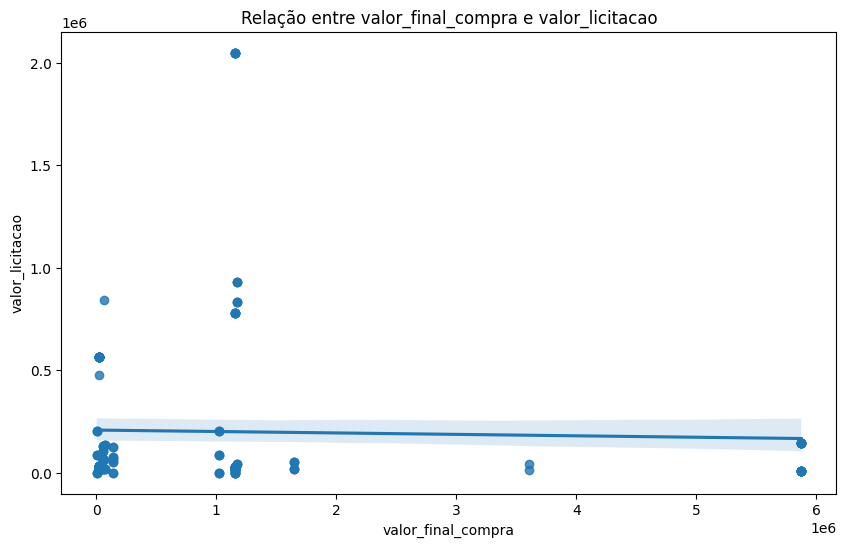

In [12]:
correlação = df['valor_final_compra'].corr(df['valor_licitacao'])
print(f"A correlação entre  valor_final_compra e valor_licitacao é: {correlação}")
if abs(correlação) > 0.7:
  print("A relação é forte.")
elif abs(correlação) > 0.3:
  print("A relação é moderada.")
else:
  print("A relação é fraca.")
  plt.figure(figsize=(10, 6))
  sns.regplot(x=df['valor_final_compra'], y=df['valor_licitacao'])
  plt.xlabel('valor_final_compra')
  plt.ylabel('valor_licitacao')
  plt.title('Relação entre valor_final_compra e valor_licitacao')
  plt.show()

A correlação entre  valor_final_compra e valor_item é: -0.0723963278792211
A relação é fraca.


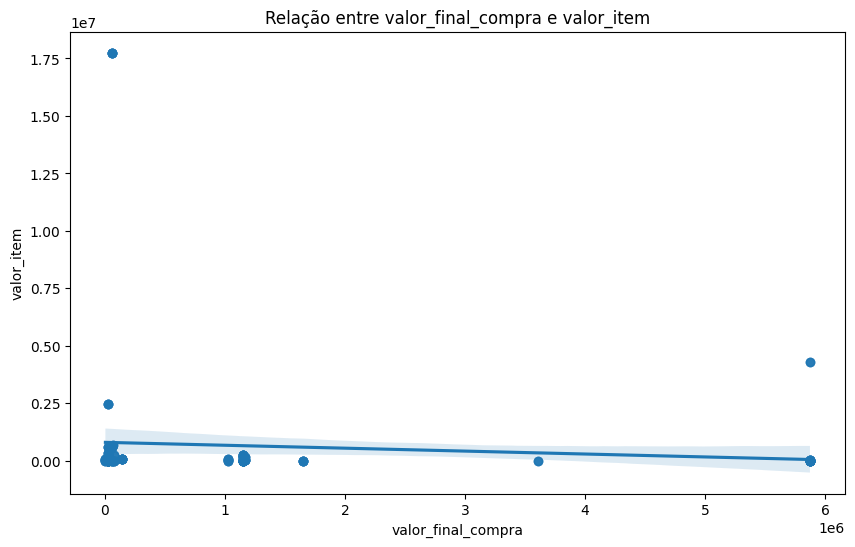

In [13]:
correlação = df['valor_final_compra'].corr(df['valor_item'])
print(f"A correlação entre  valor_final_compra e valor_item é: {correlação}")
if abs(correlação) > 0.7:
  print("A relação é forte.")
elif abs(correlação) > 0.3:
  print("A relação é moderada.")
else:
  print("A relação é fraca.")
  plt.figure(figsize=(10, 6))
  sns.regplot(x=df['valor_final_compra'], y=df['valor_item'])
  plt.xlabel('valor_final_compra')
  plt.ylabel('valor_item')
  plt.title('Relação entre valor_final_compra e valor_item')
  plt.show()

In [31]:
grupo_it = df.groupby('descricao_item')['valor_item_unico'].mean().round(2).reset_index()
grupo_it = grupo_it.sort_values('valor_item_unico',ascending=False)
display(grupo_it)

,descricao_item,valor_item_unico
27,SERVICO REDE COMUNICACAO DADOS E IMAGEM,17751150.06
20,OBRAS CIVIS DE SANEAMENTO - SISTEMA DE DRENAGE...,4271624.76
1,'SERVIDOR DE REDE',680000.0
17,OBRAS CIVIS DE EDIFICACOES PREDIAIS,590158.53
15,MANUTENCAO / REFORMA PREDIAL,181605.53
19,OBRAS CIVIS DE RECUPERACAO ESTRUTURAL - TRATAM...,154519.21
22,PESQUISA HISTORICA / DOCUMENTAL,63890.0
12,INSTALACAO E MONTAGEM DE SISTEMAS - PROTECAO C...,36014.75
13,Informação protegida por sigilo nos termos da ...,30645.24
18,OBRAS CIVIS DE RECUPERACAO ESTRUTURAL - ESTRUT...,26786.63


In [ ]:
px.bar(grupo_it,y='descricao_item',x='valor_item_unico',title='preço por item')

In [ ]:
grup_org =  df.groupby('nome_orgao_superior')[['valor_licitacao','valor_final_compra']].sum().reset_index()
grup_org['%_valor_licitacao'] = round((grup_org['valor_licitacao'] / grup_org['valor_licitacao'].sum() * 100),2).astype(str) + '%'
grup_org['%_valor_final_compra'] = round((grup_org['valor_final_compra'] / grup_org['valor_final_compra'].sum() *100),2).astype(str) + '%'
grup_org

,nome_orgao_superior,valor_licitacao,valor_final_compra,%_valor_licitacao,%_valor_final_compra
0,Advocacia-Geral da União,3464951.90,4.958314e+07,5.68%,13.13%
1,Ministério da Agricultura e Pecuária,5209623.13,1.115687e+08,8.54%,29.54%
2,"Ministério da Ciência, Tecnologia e Inovaç",687308.40,1.037610e+07,1.13%,2.75%
3,Ministério da Defesa,1865402.80,2.471874e+07,3.06%,6.54%
4,Ministério da Educação,2994362.00,1.369200e+06,4.91%,0.36%
5,Ministério da Gestão e da Inovação em Ser,756000.00,6.846000e+05,1.24%,0.18%
6,Ministério da Saúde,71959.95,1.037610e+07,0.12%,2.75%
7,Ministério do Planejamento e Orçamento,22389842.82,1.028912e+08,36.69%,27.24%
8,Presidência da República,23585609.84,6.617487e+07,38.65%,17.52%


In [ ]:
px.scatter(df,x='valor_final_compra',y='valor_licitacao',color='nome_orgao_superior',title='dispersão por orgão superior')

In [ ]:
px.box(df,x='nome_orgao_superior',y='valor_final_compra',title='boxplot por orgão superior(valor_final_compra)')

In [ ]:
px.box(df,x='nome_orgao_superior',y='valor_licitacao',title='boxplot por orgão superior(valor_licitacao)')